In [ ]:
import cv2
import numpy as np

In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving test_image.jpg!d to test_image.jpg!d


In [ ]:
os.listdir()

['.config', 'test_image.jpg!d', 'sample_data']

In [ ]:
img = cv2.imread('test_image.jpg!d')

In [ ]:
img.shape

(800, 1200, 3)

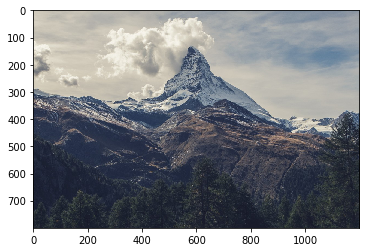

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
img=pltimg.imread('test_image.jpg!d')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
img[:,:,2].shape

(800, 1200)

In [ ]:
copy_image = img.copy()
channel_one = copy_image[:,:,0]
channel_one.shape

(800, 1200)

In [ ]:
channel_one[799][1119]

32

In [ ]:
def transform(img,k=2):
    
  # make a copy of the image
    copy_image = img.copy()

  # transforming the image of channel one (1)
    channel_one = copy_image[:,:,0]
    channel_two = copy_image[:,:,1]
    channel_three = copy_image[:,:,2]

    new_channel_one = np.zeros((1600,2400))
    new_channel_two = np.zeros((1600,2400))
    new_channel_three = np.zeros((1600,2400))
    for m,c in enumerate(channel_one):
        for n,b in enumerate(c):
            i,j = 0,0
            i,j = m*k, n*k
            new_channel_one[i][j] = b # a22
            new_channel_one[i-1][j-1] = b #a11
            new_channel_one[i-1][j] = b #a12
            new_channel_one[i][j-1] = b #a21
    print('done')
  
    for m,c in enumerate(channel_two):
         for n,b in enumerate(c):
            i,j = 0,0
            i,j = m*k, n*k
            new_channel_two[i][j] = b # a22
            new_channel_two[i-1][j-1] = b #a11
            new_channel_two[i-1][j] = b #a12
            new_channel_two[i][j-1] = b #a21
    print('done')

    for m,c in enumerate(channel_three):
         for n,b in enumerate(c):
            i,j = 0,0
            i,j = m*k, n*k
            new_channel_three[i][j] = b # a22
            new_channel_three[i-1][j-1] = b #a11
            new_channel_three[i-1][j] = b #a12
            new_channel_three[i][j-1] = b #a21
    print('done')
    return new_channel_one, new_channel_two, new_channel_three

c1, c2, c3 = transform(img, k=2)

done
done
done


In [ ]:
import numpy as np
from PIL import Image

array = np.zeros([1600, 2400, 3], dtype=np.uint8)
array[:,:,0] = c1 #index 0
array[:,:,1] = c2 # index 1
array[:,:,2] = c2 # index 2

img = Image.fromarray(array)
img.save('testrgb.png')


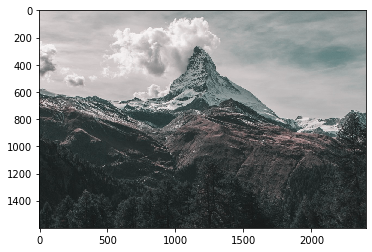

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
img=pltimg.imread('testrgb.png')
imgplot = plt.imshow(img)
plt.show()

<Figure size 57600x86400 with 0 Axes>

<Figure size 115200x172800 with 0 Axes>

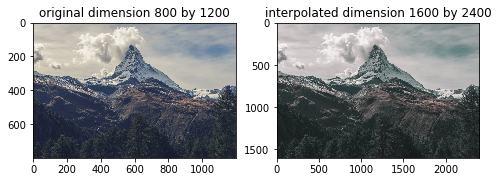

In [ ]:
# figure size = (width,height)
f1 = plt.figure(figsize=(800,1200))
f2 = plt.figure(figsize=(1600,2400))

imgone=pltimg.imread('test_image.jpg!d')
imgtwo=pltimg.imread('testrgb.png')


fig=plt.figure(figsize=(8, 8))

img = imgone
fig.add_subplot(221)
plt.title('original dimension 800 by 1200')
plt.imshow(img)

img = imgtwo
fig.add_subplot(222)
plt.title('interpolated dimension 1600 by 2400')
plt.imshow(img)
plt.show()